In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 정확도

In [2]:
# 사이킷런의 baseestimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 classifier를 생성

from sklearn.base import BaseEstimator

class MyDummyClassfier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y = None):
        pass
    
    # predict() 매서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

MyDummyClassifier를 이용해 앞 장의 타이타닉 생존자 예측을 진행

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
데이터 nan 값 :  0
DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659
교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823
교차 검

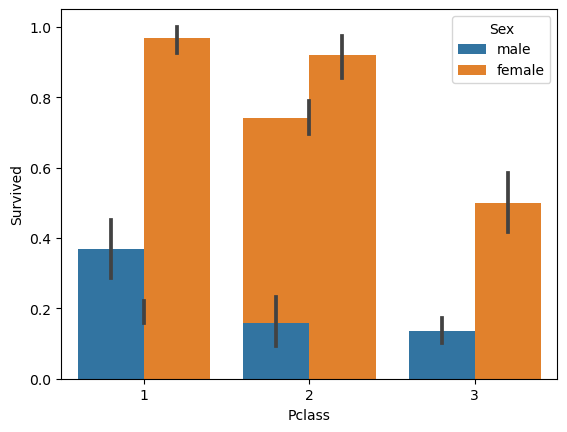

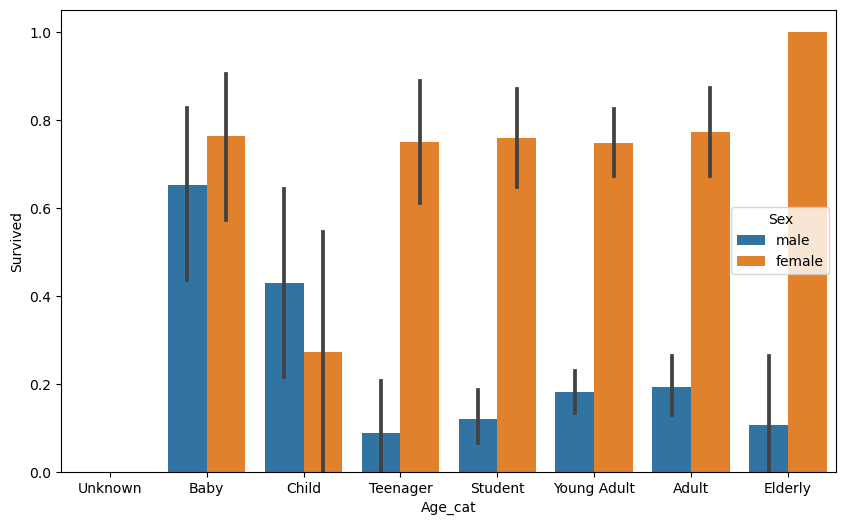

In [3]:
import pandas as pd
from 타이타닉_생존자_예측 import transform_features # 타이타닉_생존자_에측 파일에서 사용한 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
df = pd.read_csv('./data/titanic_train.csv')
y_df = df['Survived']
X_df = df.drop('Survived', axis = 1)
X_df = transform_features(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
my_clf = MyDummyClassfier()
my_clf.fit(X_train, y_train)

mypredictions = my_clf.predict(X_test)
print('Dummy Classfier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

=> 정확도를 평가 지표로 사용할 대는 매우 신중하게 사용

불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다

MNIST데이터 세트에서 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 문제로 변형

=> 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형

In [4]:
# 불균형한 데이터 세트와 Dummy Classfier를 생성

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들러오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고, 이를 astype(int)로 1로 반환, 7번이 아니면 False이고 0으로 반환
y = (digits.target == 7).astype(int)
X_train, X_test, y_trtain, y_test = train_test_split(digits.data, y, random_state = 11)

In [5]:
# 불균형한 데이터로 생성한 y_test의 데이터 분포도를 확인하고 MyFackClassifier를 이용해 예측, 평가

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 : ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 {0:.4f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 0.9000


# 오차행렬

오차 행렬 : 학습괸 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 보여주는 지표

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)


res = pd.DataFrame([['TN(True Negative)', 'FP(False Positive)'], ['FN(False Negative)', 'TP(True Positive)']],
                   columns = ['Negative(예측)', 'Positive(예측)'], index = ['Negative(실제)', 'Positive(실제)'])
res

array([[405,   0],
       [ 45,   0]], dtype=int64)

,Negative(예측),Positive(예측)
Negative(실제),TN(True Negative),FP(False Positive)
Positive(실제),FN(False Negative),TP(True Positive)


405 : 450데이터 중 무조건 Negative 0으로 예측하여 True가 된 결과

45 : posivite 1인 건수 45건을 Negative로 예측해서 False가 된 결과

# 정밀도와 재현율

- 정밀도 : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

    TP / (FP + TP)
    
- 재현율 : 실제 값이 Positive인 대상 중 예측과 실제 값이 Posivite로 일치한 데이터의 비율

    TP / (FN + TP)
    
- 재현율이 중요 지표인 경우에는 실제 Positive 양성 데이터를 Negative로 잘 못 판단하게 된 경우

- 정밀도가 중요 지표인 경우에는 실제 Negative 음성 데이터를 Positive로 잘 못 판단하게 된 경우

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 평가를 한 번에 호출하는 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [8]:
# 로지스틱 회귀 기반으로 타이타닉 생존자 예측

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
df = pd.read_csv('./data/titanic_train.csv')
y_df = df['Survived']
X_df = df.drop('Survived', axis = 1)
X_df = transform_features(X_df)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state = 11)

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

get_clf_eval(y_test, pred)

LogisticRegression(solver='liblinear')

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


## 정밀도/재현율 트레이드오프

In [15]:
# predict_proba : 확률

pred_proba = lr.predict_proba(X_test)
pred = lr.predict(X_test)

print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('\npred_proba array에서 앞 3개만 샘플로 추출 \n : ', pred_proba[:3])

# 예측 확률 array와 에측 결괏값 array를 병합해 예측 확률과 결과값을 한 눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis = 1)
print('\n두 개의 class 증에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)

pred_proba array에서 앞 3개만 샘플로 추출 
 :  [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]

두 개의 class 증에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429645 0.13570355 0.        ]]


로직을 직접 코드로 구현하면서 사이킷런의 정밀도/재현율 트레이드오프 방식을 이해하기

1. threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성

2. 생성된 Binarizer객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0으로 크면 1로 변환해 반환

In [17]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], 
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold(임계값) 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold = 1.1) # 1.1보다 크면 0으로
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [18]:
# Binarizer를 이용해 사이킷런의 predict()의 의사 코드를 만들기
# 위에서 구한 pred_prob 객체 변수에 분류 결정 임계값을 0.5로 지정한 Binaruizer 클래스를 적용해 최종 예측값을 구하는 방식

from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정 값. 분류 결정 임계값
custom_threshold = 0.5

# pred_proba() 반환값의 두 번째 컬럼. 즉 positive 클래스 컬럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [27]:
# 분류 결정 임계값을 낮추어 0.4로

custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


=> 정밀도가 낮아지면서 재현율을 증가했다

=> 분류 결정 임계값은 positive 예측값을 결정하는 확률의 기준

=> 임계값을 낮출수록 True 값이 많아진다

=> positive 에측값이 많아지면 상대적으로 재현율 값이 올라간다

=> 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다 

In [28]:
# 임계값을 0.4 ~ 0.6까지 0.05씩 증가하는 평가지표 함수 만들기

# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_thresholds(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation을 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_thresholds(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값 :  0.4
오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197

임계값 :  0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869

임계값 :  0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705

임계값 :  0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377

임계값 :  0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


사이킷런은 이와 유사한 precision_recall_curve()를 제공

- 입력 파라미터 : y_true, probas_pred

- 반환 값 : 정밀도, 재현율

In [33]:
# 인자로는 실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률 값을 입력

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve() 인자로 입력
precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임계값 배열의 Shape : ', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출, 임계값을 15step로
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))

# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도 : ', np.round(precision[thr_index], 3))
print('샘플 임계값별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape :  (165,)
샘플 추출을 위한 임계값 배열의 index 10개 :  [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값 :  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도 :  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율 :  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


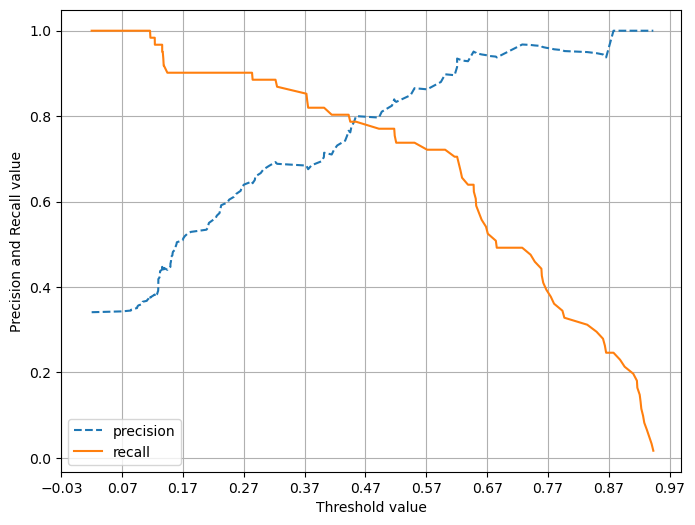

In [36]:
# 정밀동와 재현율 곡선을 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 다른 정밀도, 재현율 ndarray 추출
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # x축을 threshold값으로 y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')  
    
    # threhold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    
precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:, 1])

# F1 스코어

In [37]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('f1스코어 : {0:.4f}'.format(f1))

f1스코어 : 0.7966


In [40]:
# 임계값을 변화시키면서 F1 스코어를 포함한 평가 지표 구하기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    #f1 스코어 출력
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr.predict_proba(X_test)
get_eval_by_thresholds(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값 :  0.4
오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197, F1 : 0.7576

임계값 :  0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, F1 : 0.7869

임계값 :  0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 : 0.7966

임계값 :  0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377, F1 : 0.7965

임계값 :  0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 : 0.8000


In [41]:
# roc_curve()를 사용해 타이타닉 생존자 예측 모델의 TPR, TPR, 임계값 구하기

from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이털츨 추출하되, 임계값을 5step로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임계값 배열의 index : ', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index], 2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값 별 FPR : ', np.round(fprs[thr_index], 3))
print('샘플 임계값 별 TPR : ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index :  [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값 :  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값 별 FPR :  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값 별 TPR :  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


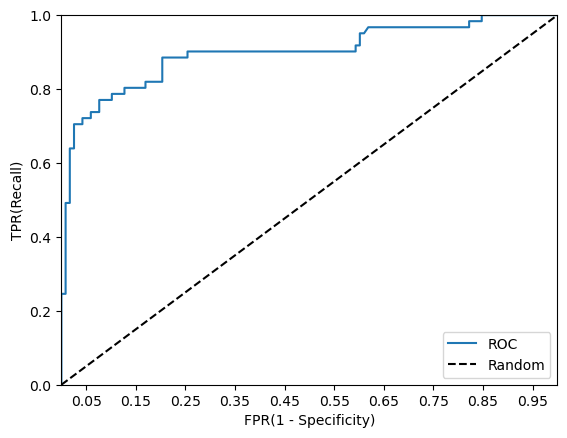

In [44]:
# roc 곡선 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # roc 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
    
    # FPR x축의 scale을 0.1 단위로 변경, X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [47]:
from sklearn.metrics import roc_auc_score

pred_proba = lr.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : ', np.round(roc_score, 4))

ROc AUC 값 :  0.8987


In [53]:
# 임계값을 변화시키면서 roc acu를 포함한 평가 지표 구하기

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    
    # ROC-AUC 출력
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))